<a href="https://colab.research.google.com/github/stiepan/MLCourse/blob/master/Logistic_regression_(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

In this exercise you will train a logistic regression model via gradient descent in two simple scenarios.
 
The general setup is as follows:
* we are given a set of pairs $(x, y)$, where $x \in R^D$ is a vector of real numbers representing the features, and $y \in \{0,1\}$ is the target,
* for a given $x$ we model the probability of $y=1$ by $h(x):=g(w^Tx)$, where $g$ is the sigmoid function: $g(z) = \frac{1}{1+e^{-z}}$,
* to find the right $w$ we will optimize the so called logarithmic loss: $J(w) = -\frac{1}{n}\sum_{i=1}^n y_i \log{h(x_i)} + (1-y_i) \log{(1-h(x_i))}$,
* with the loss function in hand we can improve our guesses iteratively:
    * $w_j^{t+1} = w_j^t - \text{step_size} \cdot \frac{\partial J(w)}{\partial w_j}$,
* we can end the process after some predefined number of epochs (or when the changes are no longer meaningful).

Let's start with the simplest example - linear separated points on a plane. 

In [0]:
%matplotlib inline

import numpy as np

np.random.seed(123)

# these parametrize the line
a = 0.3
b = -0.2
c = 0.001

# True/False mapping
def lin_rule(x, noise=0.):
    return a * x[0] + b * x[1] + c + noise < 0.

# Just for plotting
def get_y_fun(a, b, c):
    def y(x):
        return - x * a / b - c / b
    return y

lin_fun = get_y_fun(a, b, c)

In [2]:
# Training data

n = 500
range_points = 1
sigma = 0.05

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)
y = [lin_rule(x, sigma * np.random.normal()) for x in X]

print(X[:10])
print(y[:10])

[[ 0.39293837 -0.42772133]
 [-0.54629709  0.10262954]
 [ 0.43893794 -0.15378708]
 [ 0.9615284   0.36965948]
 [-0.0381362  -0.21576496]
 [-0.31364397  0.45809941]
 [-0.12285551 -0.88064421]
 [-0.20391149  0.47599081]
 [-0.63501654 -0.64909649]
 [ 0.06310275  0.06365517]]
[False, True, False, False, False, True, False, True, True, False]


Let's plot the data.

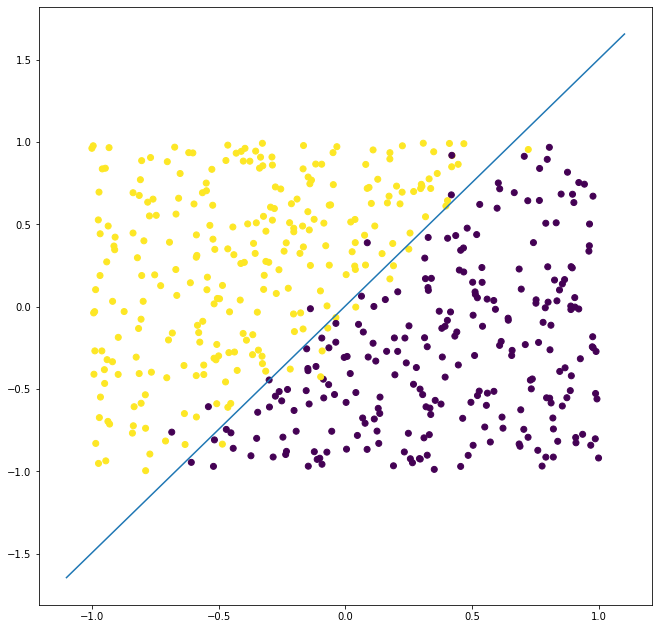

In [3]:
import matplotlib.pyplot as plt
# import seaborn as sns

range_plot = 1.1
h = .002

plt.figure(figsize=(11,11))

plt.scatter(X[:, 0], X[: , 1], c=y)

_x = np.linspace(-range_plot, range_plot, 1000)
_y = lin_fun(_x)

plt.plot(_x, _y)

Now, let's implement and train a logistic regression model.

In [0]:
ys = 1 - np.array(y)
xs = np.c_[[1.] * len(ys), X]


305.81497430913356 45.68416806467708
0.964 0.966
[0.001, 0.3, -0.2] [ -0.07631728  16.42775056 -11.38138984]


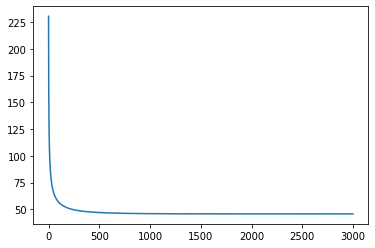

In [5]:


def sig(x, ws):
  return 1. / (1. + np.exp(-np.dot(x, ws)))


def loss(x, y, ws):
  hx = sig(x, ws)
  return -sum(y * np.log(hx) + (1 - y) * np.log(1 - hx))


def predict(x, ws, t=0.5):
  return list(map(lambda p: p > t, sig(x, ws)))

def acuracy(x, y, ws, t=0.5):
  return sum(predict(x, ws, t) == y) / len(y)


def train(x, y, l_rate=0.01, epochs=3000, ws=None):
  n = len(x)
  assert(n > 0)
  m = len(x[0])
  assert(n >= m)

  losses = []
  ws = ws or np.array([0.] * m)
  for _ in range(epochs):
    lp = np.dot(x, ws)
    y1exp = 1. / (np.exp(lp) + 1)
    y1x = (y * x.T).T
    y1p = np.dot(y1exp, y1x)
    y0exp = 1. / (np.exp(-lp) +  1)
    y0x = -((1 - y) * x.T).T
    y0p = np.dot(y0exp, y0x)
    dloss = y1p + y0p
    ws += l_rate * dloss
    losses.append(loss(x, y, ws))
  return ws, losses

ws, losses = train(xs, ys)
plt.plot(losses)

print(loss(xs, ys, [0.001, 0.3, -0.2]), losses[-1])
print(acuracy(xs, ys, [0.001, 0.3, -0.2]), acuracy(xs, ys, ws))

print([c, a, b], ws)


Let's visually asses our model. We can do this by using our estimates for $a,b,c$.

<Figure size 792x792 with 0 Axes>

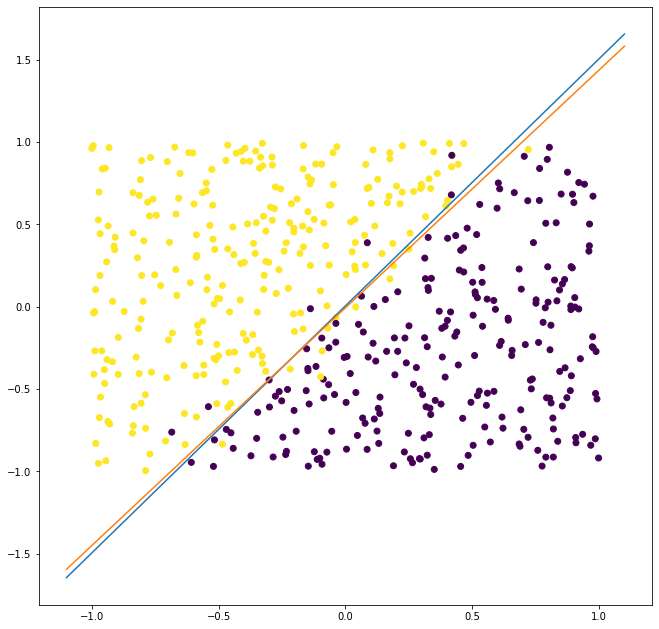

In [6]:
plt.figure(figsize=(11,11))

lin_fun2 = get_y_fun(ws[1], ws[2], ws[0])

_y2 = lin_fun2(_x)

plt.figure(figsize=(11,11))
plt.scatter(X[:, 0], X[: , 1], c=y)
plt.plot(_x, _y, _x, _y2)

Let's now complicate the things a little bit and make our next problem nonlinear.

In [0]:
# Parameters of the ellipse
s1 = 1.
s2 = 2.
r = 0.75
m1 = 0.15
m2 = 0.125

# True/False mapping, checks whether we are inside the ellipse
def circle_rule(x, noise=0.):
    return s1 * (x[0] - m1) ** 2 + s2 * (x[1] - m2) ** 2 + noise < r ** 2.

In [8]:
# Training data

n = 500
range_points = 1

sigma = 0.1

X = range_points * 2 * (np.random.rand(n, 2) - 0.5)

y = [circle_rule(x, sigma * np.random.normal()) for x in X]

print(X[:10])
print(y[:10])

[[ 0.18633789  0.87560968]
 [-0.81999293  0.61838609]
 [ 0.22604784  0.28001611]
 [ 0.9846182  -0.35783437]
 [-0.27962406  0.07170775]
 [ 0.2501677  -0.37650776]
 [ 0.41264707 -0.8357508 ]
 [-0.61039043 -0.97349628]
 [ 0.49924022  0.89579621]
 [ 0.537422   -0.65425777]]
[False, False, True, False, True, True, False, False, False, False]


Let's plot the data.

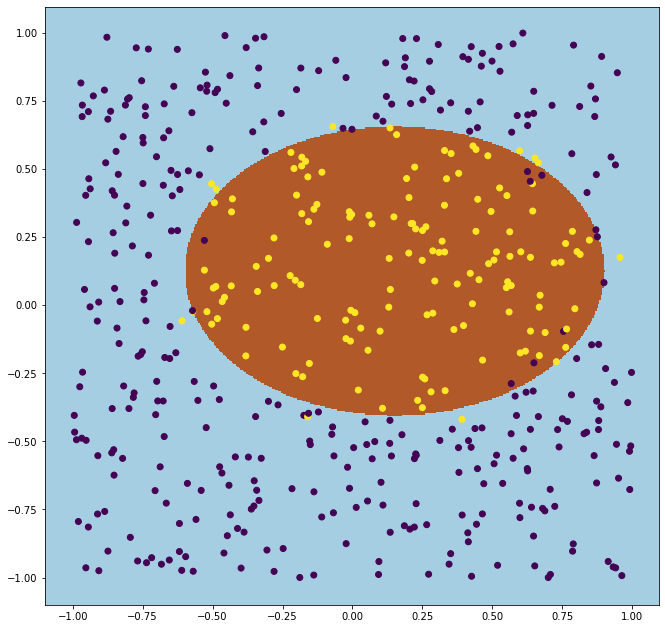

In [9]:
range_plot = 1.1
h = .005

plt.figure(figsize=(11,11))

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
Z = np.array(list(map(circle_rule, np.c_[xx.ravel(), yy.ravel()])))

Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)

Now, let's train a logistic regression model to tackle this problem. Note that we now need a nonlinear decision boundary. 

Hint: 
<sub><sup><sub><sup><sub><sup>
Use feature engineering.
</sup></sub></sup></sub></sup></sub>

In [0]:
# ys = 1 - np.array(y)
# xs = np.c_[[1.] * len(ys), X]

ys = 1 - np.array(y)
xs = np.c_[[1.] * len(ys), X, X[:, 0] ** 2, X[:, 1] **2]

63.98966263282264
0.958
[-4.02355619 -2.25423061 -4.11917793  8.00515485 15.66178812]


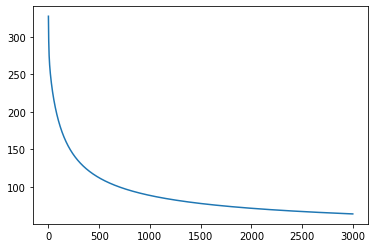

In [11]:
ws, losses = train(xs, ys, l_rate=0.001)
plt.plot(losses)

print(losses[-1])
print(acuracy(xs, ys, ws))

print(ws)

Let's visually asses our model. 

Contrary to the previous scenario, converting our weights to parameters of the ground truth curve may not be straightforward. It's easier to just provide predictions for a set of points in $R^2$.

In [12]:
range_plot = 1.1
h = .005

xx, yy = np.meshgrid(np.arange(-range_plot, range_plot, h), np.arange(-range_plot, range_plot, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]
# X_plot_bias = np.c_[[1.] * len(X_plot), X_plot]
X_plot_bias = np.c_[[1.] * len(X_plot), X_plot, X_plot[:, 0] ** 2, X_plot[:, 1] ** 2]
print(X_plot_bias)
preds = predict(X_plot_bias, ws)
# print(predict(np.array([1, -0.75, -0.75]).reshape(1, 3), ws))

[[ 1.       -1.1      -1.1       1.21      1.21    ]
 [ 1.       -1.095    -1.1       1.199025  1.21    ]
 [ 1.       -1.09     -1.1       1.1881    1.21    ]
 ...
 [ 1.        1.085     1.095     1.177225  1.199025]
 [ 1.        1.09      1.095     1.1881    1.199025]
 [ 1.        1.095     1.095     1.199025  1.199025]]


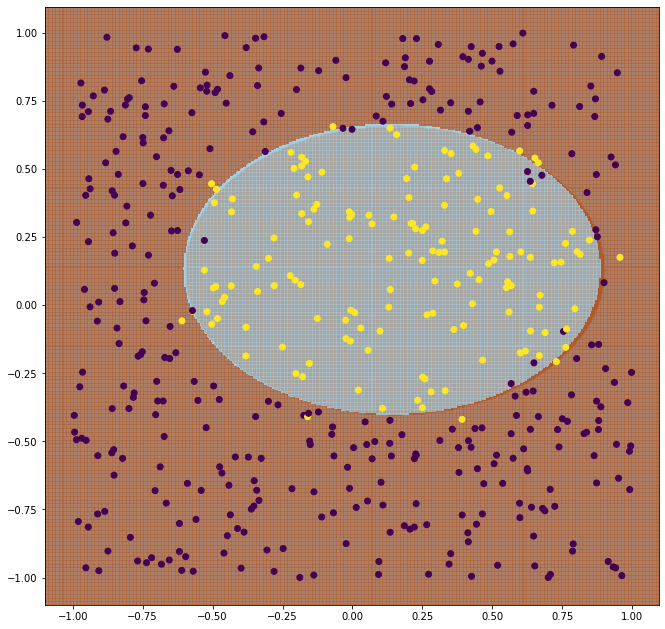

In [13]:
plt.figure(figsize=(11,11))

Z = preds
Z = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

Z = np.array(list(map(circle_rule, X_plot)))
Z = Z.reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, alpha=0.1, cmap=plt.cm.Paired)

plt.scatter(X[:, 0], X[: , 1], c=y)